In [60]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare

# Specify the path to your CSV file
df = pd.read_csv('CD127 trunk data 844-218v1.csv')

df = pd.DataFrame(df)
print(df)

# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)
print(result_df['value'])

       value  count
0        0.0      1
1        1.3      0
2        2.5      0
3        3.8      0
4        5.1      0
...      ...    ...
1032  1981.8      0
1033  1985.5      0
1034  1989.3      0
1035  1993.1      0
1036  1996.9      0

[1037 rows x 2 columns]
[   0.     8.9    8.9   10.2   12.7   14.    14.    17.8   21.7   22.9
   24.2   25.5   29.3   30.6   30.6   37.    37.    40.8   42.1   42.1
   44.6   45.9   45.9   45.9   45.9   45.9   49.7   52.3   52.3   52.3
   54.8   58.6   58.6   58.6   59.9   61.2   61.2   62.5   65.    66.3
   70.1   70.1   73.9   73.9   75.2   76.5   77.8   77.8   80.3   81.6
   81.6   81.6   82.9   82.9   84.2   84.2   84.2   85.4   86.7   86.7
   90.6   90.6   94.4   95.7   97.    97.    99.5   99.5  104.6  104.6
  104.6  107.2  111.   112.3  112.3  114.9  116.2  116.2  116.2  120.
  122.6  126.4  131.6  131.6  132.9  132.9  134.1  135.4  138.   138.
  139.3  141.9  141.9  148.3  154.7  157.3  159.9  161.2  161.2  162.5
  163.8  166.3  176.7  179.

In [65]:
#use a few different methods to estimate the best bin sizes
#calculate the SD
std_dev = np.std(result_array)
print(std_dev)

#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

#using freedman-diaconis rule (Robust (resilient to outliers) estimator that takes into account data variability and data size):
bin_size2 = np.histogram_bin_edges(result_array, bins='fd')
print("\nEstimated Bin Number using Freedman-Diaconis Rule:", len(bin_size2) -1 )

#using doane rule (ideal for non-normal datasets0):
bin_size3 = np.histogram_bin_edges(result_array, bins='doane')
print("\nEstimated Bin Number using improved Sturges' Rule:", len(bin_size3) -1 )

#using Scott's rule (Less robust estimator that takes into account data variability and data size):
bin_size4 = np.histogram_bin_edges(result_array, bins='scott')
print("\nEstimated Bin Number using Scott's Rule:", len(bin_size4) -1 )

#using stone rule (Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule)
bin_size5 = np.histogram_bin_edges(result_array, bins='stone')
print("\nEstimated Bin Number using the Stone Rule:", len(bin_size5) -1 )

#using rice rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size6 = np.histogram_bin_edges(result_array, bins='rice')
print("\nEstimated Bin Number using the Rice Rule:", len(bin_size6) -1 )

#using sturges rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size7 = np.histogram_bin_edges(result_array, bins='sturges')
print("\nEstimated Bin Number using the sturges Rule:", len(bin_size7) -1 )

#using square root rule (Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.):
bin_size8 = np.histogram_bin_edges(result_array, bins='sqrt')
print("\nEstimated Bin Number using square roots Rule:", len(bin_size8) -1 )

246.163018359006

Estimated Bin Number using Auto Rule: 16

Estimated Bin Number using Freedman-Diaconis Rule: 16

Estimated Bin Number using improved Sturges' Rule: 13

Estimated Bin Number using Scott's Rule: 13

Estimated Bin Number using the Stone Rule: 34

Estimated Bin Number using the Rice Rule: 14

Estimated Bin Number using the sturges Rule: 10

Estimated Bin Number using square roots Rule: 19


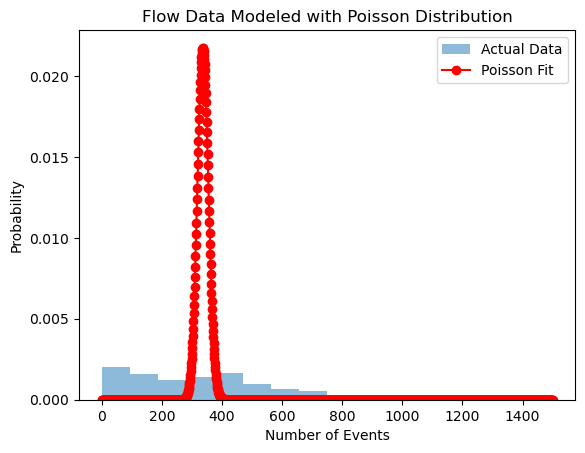

In [66]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size1, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

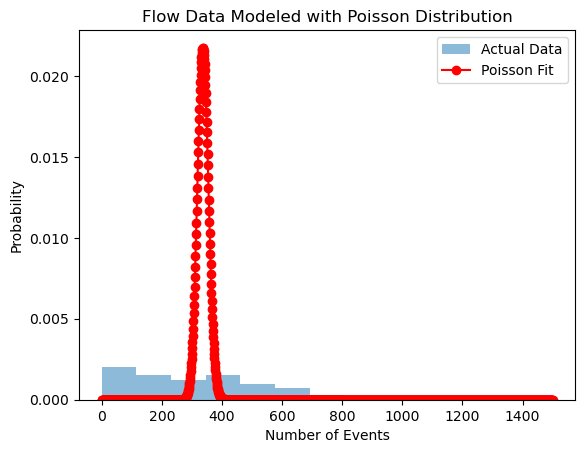

In [67]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)
#poisson_param = np.mean(df2['count'])

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size3, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

In [68]:
# Assuming a Poisson distribution with a certain lambda (adjust accordingly)
lambda_value = np.mean(result_array)
poisson_dist = poisson(lambda_value)

# Expected frequencies based on the Poisson distribution
expected_frequencies = poisson_dist.pmf(np.arange(0, np.max(result_array) + 1)) * len(result_array)

# Observed frequencies from your data
observed_frequencies, _ = np.histogram(result_array, bins=np.arange(0, np.max(result_array) + 2))

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f'Chi-squared statistic: {chi2_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The null hypothesis is rejected. The data is significantly different from a Poisson distribution.')
else:
    print('The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.')
    

# Assuming a Poisson distribution with a certain lambda (adjust accordingly)
lambda_value = np.mean(result_array2)
poisson_dist = poisson(lambda_value)

# Expected frequencies based on the Poisson distribution
expected_frequencies = poisson_dist.pmf(np.arange(0, np.max(result_array2) + 1)) * len(result_array2)

# Observed frequencies from your data
observed_frequencies, _ = np.histogram(result_array2, bins=np.arange(0, np.max(result_array2) + 2))

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f'Chi-squared statistic: {chi2_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The null hypothesis is rejected. The data is significantly different from a Poisson distribution.')
else:
    print('The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.')

Chi-squared statistic: nan
P-value: nan
The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.


C:\Users\cfraser002\AppData\Local\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\cfraser002\AppData\Local\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


      value
0      0.00
0      0.00
0      0.00
0      0.00
0      0.00
..      ...
25  1064.06
25  1064.06
25  1064.06
25  1064.06
25  1064.06

[1431 rows x 1 columns]
[   0.      0.      0.   ... 1064.06 1064.06 1064.06]


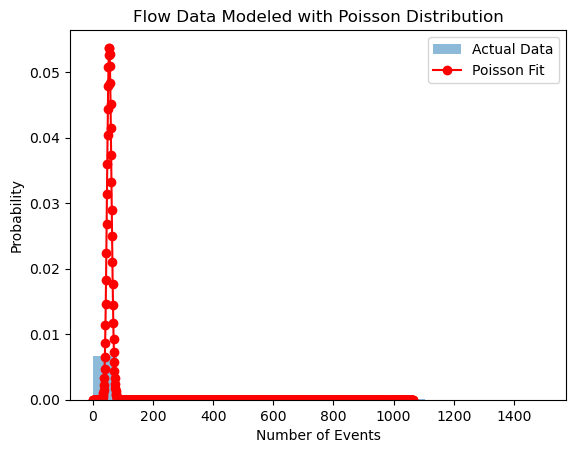

In [56]:

# Specify the path to your CSV file
df2 = pd.DataFrame(pd.DataFrame(pd.read_csv('CD127_binsof42_844-218v1.csv')))

# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})

# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()
print(result_df2)
print(result_array2)

# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(df2['count'])

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array2) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array2, bins=bin_size8, alpha=0.5, label='Actual Data', density=True)
 
# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

In [58]:
# Assuming a Poisson distribution with a certain lambda (adjust accordingly)
lambda_value = np.mean(result_array2)
poisson_dist = poisson(lambda_value)

# Expected frequencies based on the Poisson distribution
expected_frequencies = poisson_dist.pmf(np.arange(0, np.max(result_array2) + 1)) * len(result_array2)

# Observed frequencies from your data
observed_frequencies, _ = np.histogram(result_array2, bins=np.arange(0, np.max(result_array2) + 2))

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f'Chi-squared statistic: {chi2_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The null hypothesis is rejected. The data is significantly different from a Poisson distribution.')
else:
    print('The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.')

Chi-squared statistic: 1.3342157454050362e+307
P-value: 0.0
The null hypothesis is rejected. The data is significantly different from a Poisson distribution.
